In [1]:
#Bibliotecas Necessárias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange

In [2]:
# Dados socioeconomicos
url_socioeconomico2016_2 = 'http://dados.ufrn.br/dataset/8e0cb3ac-b6fa-48ef-a1ee-f2df0b893b72/resource/bb3f78da-55a7-4b23-abdc-9de974dc1e31/download/dados-socio-economicos-20162'
url_socioeconomico2016_1 = 'http://dados.ufrn.br/dataset/8e0cb3ac-b6fa-48ef-a1ee-f2df0b893b72/resource/2f195ce7-f01a-4b41-acbd-b6245ccf0145/download/dados-socio-economicos-20161'

#Cria dataframe com os dados socioeconomicos importados
df_socioeconomico2016_1  = pd.read_csv(url_socioeconomico2016_1, sep=';')
df_socioeconomico2016_2  = pd.read_csv(url_socioeconomico2016_2, sep=';')

In [3]:
# Dados dos alunos matriculados
url_ingressantes2016_1 = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/4778d3ce-8898-46a8-a623-ee6a480a2980/download/matriculas-de-2016.1.csv'
url_ingressantes2016_2 = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/f6179838-b619-4d7d-af9c-18c438b80dd4/download/matriculas-de-2016.2.csv'

# Dataframe dos alunos ingressantes matriculados
df_ingressantes2016_1 = pd.read_csv(url_ingressantes2016_1, sep=';')
df_ingressantes2016_2 = pd.read_csv(url_ingressantes2016_2, sep=';')

In [4]:
#Inserindo matriculas e dados socieconomicos em uma lista
matriculas      = []
socioeconomicos = []

for i in range(16,17):
    for j in range (1,3):
        matriculas.append(vars()['df_ingressantes20%d_%d' % (i, j)])
        socioeconomicos.append(vars()['df_socioeconomico20%d_%d' % (i, j)])

In [5]:
# concatenando todas as listas em um dataframe
df_matriculas      = pd.concat(matriculas)
df_socioeconomicos = pd.concat(socioeconomicos)

# limpandos os index após o merge
df_matriculas.reset_index(drop=True,inplace=True)
df_socioeconomicos.reset_index(drop=True,inplace=True)


In [6]:
# verificando inicialmente os dados importados
df_matriculas.tail()

,id_turma,discente,id_curso,unidade,nota,reposicao,faltas_unidade,media_final,numero_total_faltas,descricao,Unnamed: 10
1290982,57589723,5067db39ec989382bacb3744b25392e5,315741.0,NaN,NaN,NaN,NaN,5.0,4.0,APROVADO,NaN
1290983,57589723,98ffc266cd1c20251360bff8d28da793,315741.0,NaN,NaN,NaN,NaN,5.0,12.0,APROVADO,NaN
1290984,57589723,0d270dad53b68649fdcbd01fc9ed953d,315741.0,NaN,NaN,NaN,NaN,5.0,4.0,APROVADO,NaN
1290985,57590652,d40115aaea7a876d8b1eacb94fac4d85,315756.0,NaN,NaN,NaN,NaN,4.0,2.0,APROVADO,NaN
1290986,57591531,87dc1bf123938a9645c1ee84ce51a697,315745.0,NaN,NaN,NaN,NaN,5.0,0.0,APROVADO,NaN


In [7]:
# verificando inicialmente os dados importados
df_socioeconomicos.tail()

,id_discente,ano,periodo,renda,escola_ens_medio,possui_bolsa_pesquisa,possui_auxilio_alimentacao,possui_auxilio_transporte,possui_auxilio_residencia_moradia
25215,8c4adbc1a6a3862be6b5b1f049b5f0b1,2016,2,880.0,Todo em escola publica,f,f,f,f
25216,9c938fda4d2fb52e825c921c226059b8,2016,2,740.0,Todo em escola publica,f,t,f,f
25217,c8817d2c1f038a0b0c220e18a615ad3d,2016,2,880.0,Parte em escola pública parte em escola partic...,t,t,f,f
25218,8aca3dc52421454a81cfb6c8c4a08bfc,2016,2,8800.0,Todo em escola publica,f,f,t,f
25219,5260ad5ed0ea02529bfbc32096ee36f7,2016,2,880.0,Todo em escola publica,f,f,f,f


In [8]:
# Discernindo situação socioeconomica dos discentes em classes sociais
# http://www.abep.org/criterio-brasil

bins = [0,768,1625,2705,4852,9254, df_socioeconomicos['renda'].max()]

df_socioeconomicos["classe"] = pd.cut(
        df_socioeconomicos["renda"], bins, 
        labels=["D","C2","C1","B2","B1","A"], 
        include_lowest=True,
    )

df_socioeconomicos.tail()

,id_discente,ano,periodo,renda,escola_ens_medio,possui_bolsa_pesquisa,possui_auxilio_alimentacao,possui_auxilio_transporte,possui_auxilio_residencia_moradia,classe
25215,8c4adbc1a6a3862be6b5b1f049b5f0b1,2016,2,880.0,Todo em escola publica,f,f,f,f,C2
25216,9c938fda4d2fb52e825c921c226059b8,2016,2,740.0,Todo em escola publica,f,t,f,f,D
25217,c8817d2c1f038a0b0c220e18a615ad3d,2016,2,880.0,Parte em escola pública parte em escola partic...,t,t,f,f,C2
25218,8aca3dc52421454a81cfb6c8c4a08bfc,2016,2,8800.0,Todo em escola publica,f,f,t,f,B1
25219,5260ad5ed0ea02529bfbc32096ee36f7,2016,2,880.0,Todo em escola publica,f,f,f,f,C2


In [9]:
# Organizando dados para exibir gráficos

df_socioeconomicos['periodo'] = df_socioeconomicos.ano.astype(str).str.cat(df_socioeconomicos.periodo.astype(str), sep='-')
df_socioeconomicos = df_socioeconomicos.groupby(['periodo', 'classe']).count()
df_socioeconomicos['id_discente']

periodo  classe
2016-1   D         1540
         C2        4545
         C1        2274
         B2        1523
         B1         842
         A          829
2016-2   D         1319
         C2        5071
         C1        2928
         B2        2143
         B1        1300
         A          906
Name: id_discente, dtype: int64

TypeError: ('2016-1', 'D') is not a string

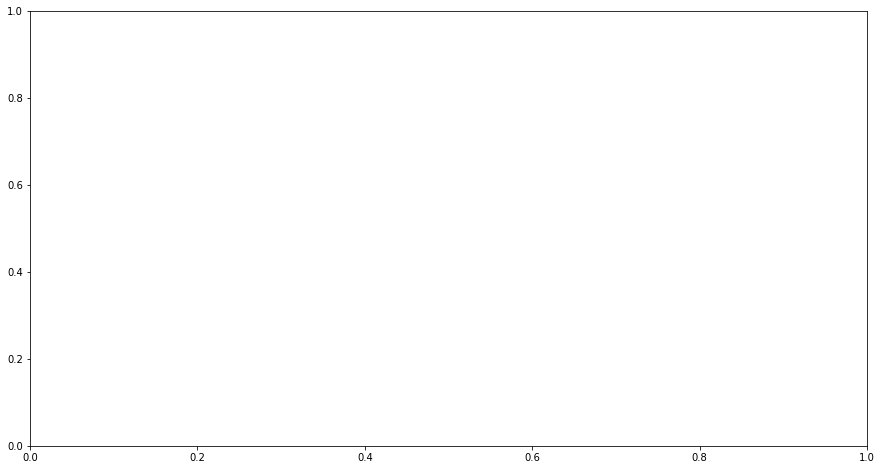

In [10]:
fig, axies12 = plt.subplots(figsize=(15,8))
for i in range(7):
    start_index = 0;
    end_index = 7;
    subset = df_socioeconomicos[start_index:end_index]
    axies12 = plt.plot(subset[df_socioeconomicos.columns[i]])
plt.title("GRÁFICO - 1")
plt.legend(loc='upper left')
plt.show()